In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [21]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [86]:
X = iris.data[:, 2:4]          # shape (150, 2)
y = iris.target  # Virginica vs Versicolour vs Setosa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

## Softmax (Multinomial Logistic Regression) trained with Gradient Descent (from scratch)

In [87]:
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=1, keepdims=True)
def compute_cost(y, p):
    eps = 1e-7
    p = np.clip(p, eps, 1 - eps)
    loss = -np.mean(np.sum(y * np.log(p), axis=1))
    return loss
def one_hot(y, num_classes):
    Y = np.zeros((len(y), num_classes))
    Y[np.arange(len(y)), y] = 1
    return Y


In [143]:
m, n = X_train.shape
k = len(np.unique(y_train))

y_train_oh = one_hot(y_train, k)
y_test_oh = one_hot(y_test, k)

w = np.zeros((n, k))
b = np.zeros(k)

lr=0.1
epochs = 5000

for epoch in range(epochs):
    z = X_train.dot(w) + b
    p = softmax(z)
    
    loss = compute_cost(y_train_oh, p)
    
    dz = p - y_train_oh
    dw = 1/m * X_train.T.dot(dz)
    db = 1/m * np.sum(dz, axis=0)

    w -= lr * dw
    b -= lr * db


z = X_test.dot(w) + b
p = softmax(z)
scratch_loss = compute_cost(y_test_oh, p)
scratch_predict = np.argmax(p, axis=1)
scratch_loss

np.float64(0.1172475365121946)

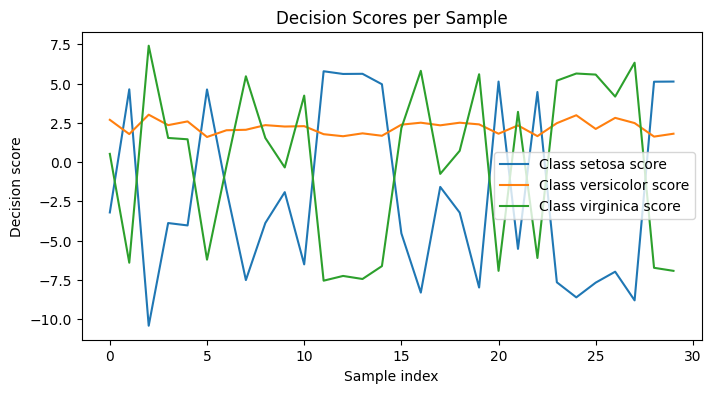

In [144]:
plt.figure(figsize=(8,4))
plt.plot(z[:, 0], label=f"Class {iris.target_names[0]} score")
plt.plot(z[:, 1], label=f"Class {iris.target_names[1]} score")
plt.plot(z[:, 2], label=f"Class {iris.target_names[2]} score")
plt.xlabel("Sample index")
plt.ylabel("Decision score")
plt.title("Decision Scores per Sample")
plt.legend()
plt.show()

<Figure size 700x600 with 0 Axes>

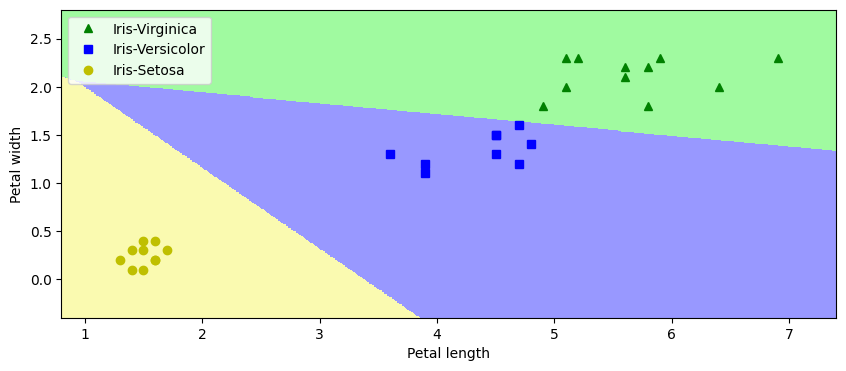

In [145]:
x1, x2 = np.meshgrid(
    np.linspace(X_test[:,0].min()-0.5, X_test[:,0].max()+0.5, 300),
    np.linspace(X_test[:,1].min()-0.5, X_test[:,1].max()+0.5, 300)
)

X_new = np.c_[x1.ravel(), x2.ravel()]
z_new = X_new @ w + b
p_new = softmax(z_new)
predict = np.argmax(p_new, axis=1)

zz1 = p_new[:, 1].reshape(x1.shape)
zz = predict.reshape(x1.shape)


plt.figure(figsize=(7,6))
plt.figure(figsize=(10, 4))
plt.plot(X_test[y_test==2, 0], X_test[y_test==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x1, x2, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

## Softmax (Multinomial Logistic Regression) with sklearn

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

softmax_reg = LogisticRegression(solver="lbfgs", random_state=42)
softmax_reg.fit(X_train, y_train)
softmax_reg.coef_, softmax_reg.intercept_

(array([[-2.59524071, -1.09048831],
        [ 0.0739952 , -0.74732063],
        [ 2.52124551,  1.83780894]]),
 array([ 10.39369743,   2.91401203, -13.30770947]))

In [147]:
prob = softmax_reg.predict_proba(X_test)
sklearn_loss = log_loss(y_test, prob)
sklearn_loss

0.11014717065038974

<Figure size 700x600 with 0 Axes>

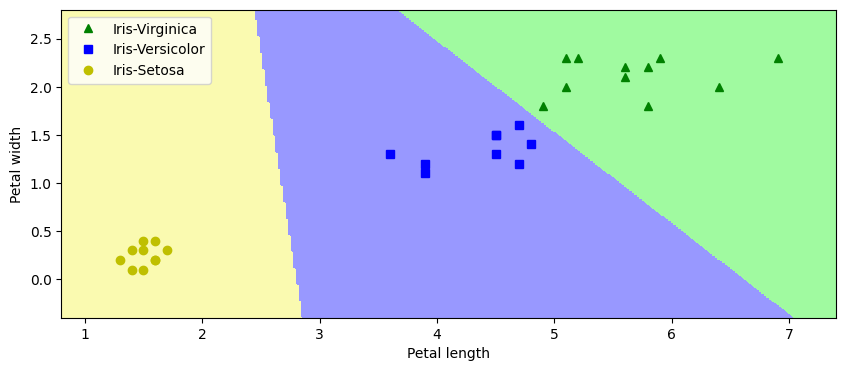

In [148]:
x1, x2 = np.meshgrid(
    np.linspace(X_test[:,0].min()-0.5, X_test[:,0].max()+0.5, 300),
    np.linspace(X_test[:,1].min()-0.5, X_test[:,1].max()+0.5, 300)
)

X_new = np.c_[x1.ravel(), x2.ravel()]
p = softmax_reg.predict_proba(X_new)
predict = softmax_reg.predict(X_new)


zz = predict.reshape(x1.shape)


plt.figure(figsize=(7,6))
plt.figure(figsize=(10, 4))
plt.plot(X_test[y_test==2, 0], X_test[y_test==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x1, x2, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.show()

## Compare Scratch and Sklearn

In [149]:
import pandas as pd

# scratch
scratch_W = w              # shape (2, 3)
scratch_b = b              # shape (3,)

# sklearn
sklearn_W = softmax_reg.coef_.T    # transpose to match (2, 3)
sklearn_b = softmax_reg.intercept_

rows = []

for cls in range(3):
    for feat in range(2):
        rows.append({
            "Model": "Scratch",
            "Class": cls,
            "Feature": f"x{feat+1}",
            "Weight": scratch_W[feat, cls]
        })
        rows.append({
            "Model": "Sklearn",
            "Class": cls,
            "Feature": f"x{feat+1}",
            "Weight": sklearn_W[feat, cls]
        })

# bias
for cls in range(3):
    rows.append({
        "Model": "Scratch",
        "Class": cls,
        "Feature": "bias",
        "Weight": scratch_b[cls]
    })
    rows.append({
        "Model": "Sklearn",
        "Class": cls,
        "Feature": "bias",
        "Weight": sklearn_b[cls]
    })

df = pd.DataFrame(rows)
df

,Model,Class,Feature,Weight
0,Scratch,0,x1,-1.614908
1,Sklearn,0,x1,-2.595241
2,Scratch,0,x2,-3.327350
3,Sklearn,0,x2,-1.090488
4,Scratch,1,x1,0.533980
5,Sklearn,1,x1,0.073995
6,Scratch,1,x2,-0.770594
7,Sklearn,1,x2,-0.747321
8,Scratch,2,x1,1.080927
9,Sklearn,2,x1,2.521246


In [150]:
df = pd.DataFrame({
    "scratch": [scratch_loss],
    "sklearn": [sklearn_loss]
})
df

scratch_W

array([[-1.61490767,  0.53398046,  1.0809272 ],
       [-3.32735034, -0.77059424,  4.09794458]])

In [151]:
df = pd.DataFrame({
    "Feature": ["Petal Length", "Petal Width"],
    "scratch": [scratch_W[0, 0], scratch_W[1, 0]],
    "sklearn": [sklearn_W[0, 0], sklearn_W[1, 0]],
})
df

,Feature,scratch,sklearn
0,Petal Length,-1.614908,-2.595241
1,Petal Width,-3.327350,-1.090488


In [152]:
df = pd.DataFrame({
    "Feature": ["Petal Length", "Petal Width"],
    "scratch": [scratch_W[0, 1], scratch_W[1, 1]],
    "sklearn": [sklearn_W[0, 1], sklearn_W[1, 1]],
})
df

,Feature,scratch,sklearn
0,Petal Length,0.533980,0.073995
1,Petal Width,-0.770594,-0.747321


In [153]:
df = pd.DataFrame({
    "Feature": ["Petal Length", "Petal Width"],
    "scratch": [scratch_W[0, 2], scratch_W[1, 2]],
    "sklearn": [sklearn_W[0, 2], sklearn_W[1, 2]],
})
df

,Feature,scratch,sklearn
0,Petal Length,1.080927,2.521246
1,Petal Width,4.097945,1.837809


In [154]:
sklearn_predict = softmax_reg.predict(X_test)

scratch_accuracy = np.mean(y_test == scratch_predict)
sklearn_accuracy = np.mean(y_test == sklearn_predict)

df = pd.DataFrame({
    "scratch": [scratch_accuracy],
    "sklearn": [sklearn_accuracy],
})
df

,scratch,sklearn
0,1.0,1.0
